# Importing packages

In [1]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata

/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/jaehyunchoi/.conda/envs/test02/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarn

In [3]:
# Tutorial for scRNA-seq import and analysis in scanpy , updated 20250417
# Jaehyunchoi based on Bystander T cell project
# conda env test02

# Fastq preprocessing

In [4]:
Path10x_MTC='/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/CRresult_Bystander/exon_only/run_Bystander_MTC/outs/filtered_feature_bc_matrix/'
Path10x_7='/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/CRresult_Bystander/exon_only/run_Bystander_IL7/outs/filtered_feature_bc_matrix/'
Path10x_7_25='/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/CRresult_Bystander/exon_only/run_Bystander_IL7_IL25/outs/filtered_feature_bc_matrix/'
Path10x_7_33='/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/CRresult_Bystander/exon_only/run_Bystander_IL7_IL33/outs/filtered_feature_bc_matrix/'
Path10x_7_25_33='/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/CRresult_Bystander/exon_only/run_Bystander_IL7_IL25_IL33/outs/filtered_feature_bc_matrix/'

# Read matrix
adata_MTC = sc.read_10x_mtx(Path10x_MTC,var_names='gene_symbols',cache=True)
adata_IL7 = sc.read_10x_mtx(Path10x_7,var_names='gene_symbols',cache=True)
adata_IL7_IL25 = sc.read_10x_mtx(Path10x_7_25,var_names='gene_symbols',cache=True)
adata_IL7_IL33 = sc.read_10x_mtx(Path10x_7_33,var_names='gene_symbols',cache=True)
adata_IL7_IL25_IL33 = sc.read_10x_mtx(Path10x_7_25_33,var_names='gene_symbols',cache=True)

In [6]:
# MTC filtering 
adata = adata_MTC
# AnnData 객체의 cell별 UMI 수 확인
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

# AnnData 객체의 gene 수 확인 (cell별로 검출된 gene 수)
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1).A1

# 각 세포에 대해 확인된 UMI와 gene 수 출력
print(adata.obs[['n_counts', 'n_genes']])
# 미토콘드리아 유전자 식별 (gene names에 'MT-'가 포함된 것들)
mt_genes = adata.var_names.str.startswith('mt-')

# 미토콘드리아 유전자 발현량 계산
adata.obs['mt_counts'] = adata[:, mt_genes].X.sum(axis=1).A1
# 전체 유전자 발현량 대비 미토콘드리아 유전자 비율 계산
adata.obs['mt_frac'] = adata.obs['mt_counts'] / adata.obs['n_counts']

# 유효한 세포 기준으로 필터링 (유전자 수 750 이상, UMI 수 1500 이상, 미토콘드리아 비율 5% 이하)
adata = adata[(adata.obs['n_genes'] > 750) & (adata.obs['n_counts'] > 1500), :]
adata = adata[adata.obs['mt_frac'] < 0.05, :]
adata_MTC = adata

# IL7 filtering 
adata = adata_IL7
# AnnData 객체의 cell별 UMI 수 확인
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

# AnnData 객체의 gene 수 확인 (cell별로 검출된 gene 수)
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1).A1

# 각 세포에 대해 확인된 UMI와 gene 수 출력
print(adata.obs[['n_counts', 'n_genes']])
# 미토콘드리아 유전자 식별 (gene names에 'MT-'가 포함된 것들)
mt_genes = adata.var_names.str.startswith('mt-')

# 미토콘드리아 유전자 발현량 계산
adata.obs['mt_counts'] = adata[:, mt_genes].X.sum(axis=1).A1
# 전체 유전자 발현량 대비 미토콘드리아 유전자 비율 계산
adata.obs['mt_frac'] = adata.obs['mt_counts'] / adata.obs['n_counts']

# 유효한 세포 기준으로 필터링 (유전자 수 750 이상, UMI 수 1500 이상, 미토콘드리아 비율 5% 이하)
adata = adata[(adata.obs['n_genes'] > 750) & (adata.obs['n_counts'] > 1500), :]
adata = adata[adata.obs['mt_frac'] < 0.05, :]
adata_IL7 = adata

# IL7_IL25 filtering 
adata = adata_IL7_IL25
# AnnData 객체의 cell별 UMI 수 확인
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

# AnnData 객체의 gene 수 확인 (cell별로 검출된 gene 수)
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1).A1

# 각 세포에 대해 확인된 UMI와 gene 수 출력
print(adata.obs[['n_counts', 'n_genes']])
# 미토콘드리아 유전자 식별 (gene names에 'MT-'가 포함된 것들)
mt_genes = adata.var_names.str.startswith('mt-')

# 미토콘드리아 유전자 발현량 계산
adata.obs['mt_counts'] = adata[:, mt_genes].X.sum(axis=1).A1
# 전체 유전자 발현량 대비 미토콘드리아 유전자 비율 계산
adata.obs['mt_frac'] = adata.obs['mt_counts'] / adata.obs['n_counts']

# 유효한 세포 기준으로 필터링 (유전자 수 750 이상, UMI 수 1500 이상, 미토콘드리아 비율 5% 이하)
adata = adata[(adata.obs['n_genes'] > 750) & (adata.obs['n_counts'] > 1500), :]
adata = adata[adata.obs['mt_frac'] < 0.05, :]
adata_IL7_IL25 = adata
# IL7_IL33 filtering 
adata = adata_IL7_IL33
# AnnData 객체의 cell별 UMI 수 확인
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

# AnnData 객체의 gene 수 확인 (cell별로 검출된 gene 수)
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1).A1

# 각 세포에 대해 확인된 UMI와 gene 수 출력
print(adata.obs[['n_counts', 'n_genes']])
# 미토콘드리아 유전자 식별 (gene names에 'MT-'가 포함된 것들)
mt_genes = adata.var_names.str.startswith('mt-')

# 미토콘드리아 유전자 발현량 계산
adata.obs['mt_counts'] = adata[:, mt_genes].X.sum(axis=1).A1
# 전체 유전자 발현량 대비 미토콘드리아 유전자 비율 계산
adata.obs['mt_frac'] = adata.obs['mt_counts'] / adata.obs['n_counts']

# 유효한 세포 기준으로 필터링 (유전자 수 750 이상, UMI 수 1500 이상, 미토콘드리아 비율 5% 이하)
adata = adata[(adata.obs['n_genes'] > 750) & (adata.obs['n_counts'] > 1500), :]
adata = adata[adata.obs['mt_frac'] < 0.05, :]
adata_IL7_IL33 = adata

# IL7_IL25_IL33 filtering 
adata = adata_IL7_IL25_IL33
# AnnData 객체의 cell별 UMI 수 확인
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

# AnnData 객체의 gene 수 확인 (cell별로 검출된 gene 수)
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1).A1

# 각 세포에 대해 확인된 UMI와 gene 수 출력
print(adata.obs[['n_counts', 'n_genes']])
# 미토콘드리아 유전자 식별 (gene names에 'MT-'가 포함된 것들)
mt_genes = adata.var_names.str.startswith('mt-')

# 미토콘드리아 유전자 발현량 계산
adata.obs['mt_counts'] = adata[:, mt_genes].X.sum(axis=1).A1
# 전체 유전자 발현량 대비 미토콘드리아 유전자 비율 계산
adata.obs['mt_frac'] = adata.obs['mt_counts'] / adata.obs['n_counts']

# 유효한 세포 기준으로 필터링 (유전자 수 750 이상, UMI 수 1500 이상, 미토콘드리아 비율 5% 이하)
adata = adata[(adata.obs['n_genes'] > 750) & (adata.obs['n_counts'] > 1500), :]
adata = adata[adata.obs['mt_frac'] < 0.05, :]
adata_IL7_IL25_IL33 = adata

                    n_counts  n_genes
AAACCTGAGAGACTAT-1    6318.0     2248
AAACCTGAGTGTACGG-1    1844.0      941
AAACCTGCACCAGTTA-1    4983.0     1774
AAACCTGCACGCTTTC-1    2836.0     1231
AAACCTGCACGTTGGC-1    1824.0      996
...                      ...      ...
TTTGTCATCGCGTAGC-1    1886.0      984
TTTGTCATCTCAACTT-1    3302.0     1465
TTTGTCATCTGCGGCA-1    2344.0      924
TTTGTCATCTGGAGCC-1    3084.0     1511
TTTGTCATCTGTTGAG-1    2430.0     1214

[7883 rows x 2 columns]
                    n_counts  n_genes
AAACCCAAGCAGGCTA-1    8517.0     2410
AAACCCAAGCCGGAAT-1   21245.0     3973
AAACCCAAGCCGTTGC-1    4911.0     1782
AAACCCACACTGCGTG-1   31020.0     5064
AAACCCACATGAAGGC-1    3880.0     1374
...                      ...      ...
TTTGTTGGTCGCATGC-1    4838.0     1988
TTTGTTGGTGATTAGA-1    2881.0     1222
TTTGTTGGTGGGTCAA-1    6164.0     1881
TTTGTTGTCACTACTT-1    4197.0     1627
TTTGTTGTCAGCGTCG-1    3671.0     1248

[12044 rows x 2 columns]
                    n_counts  n_genes

# quality check

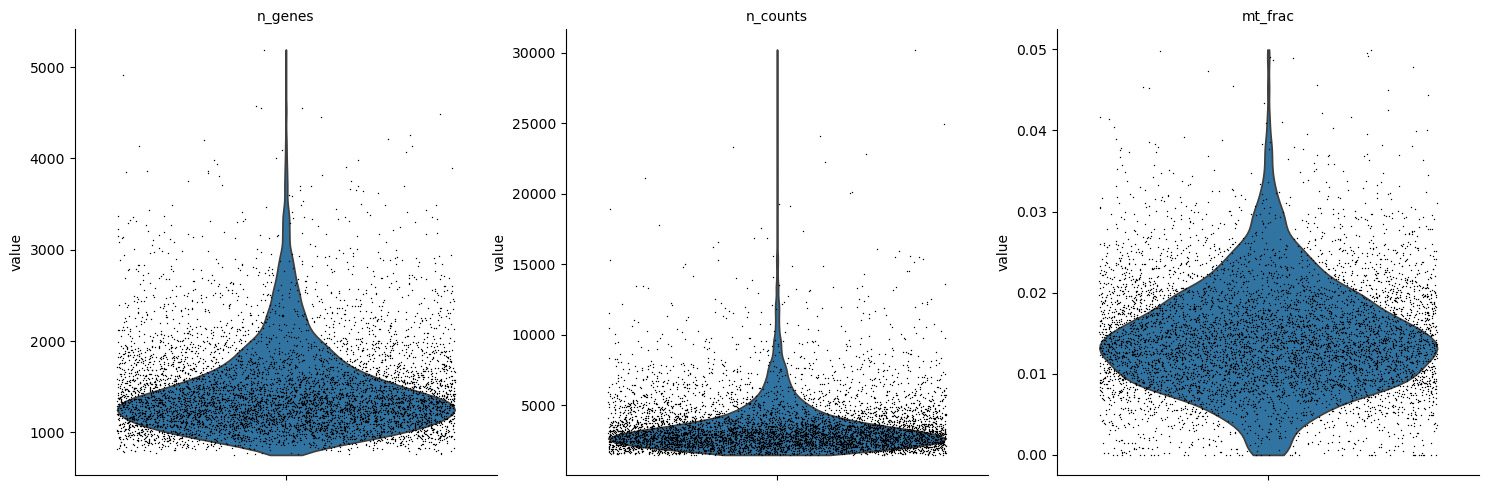

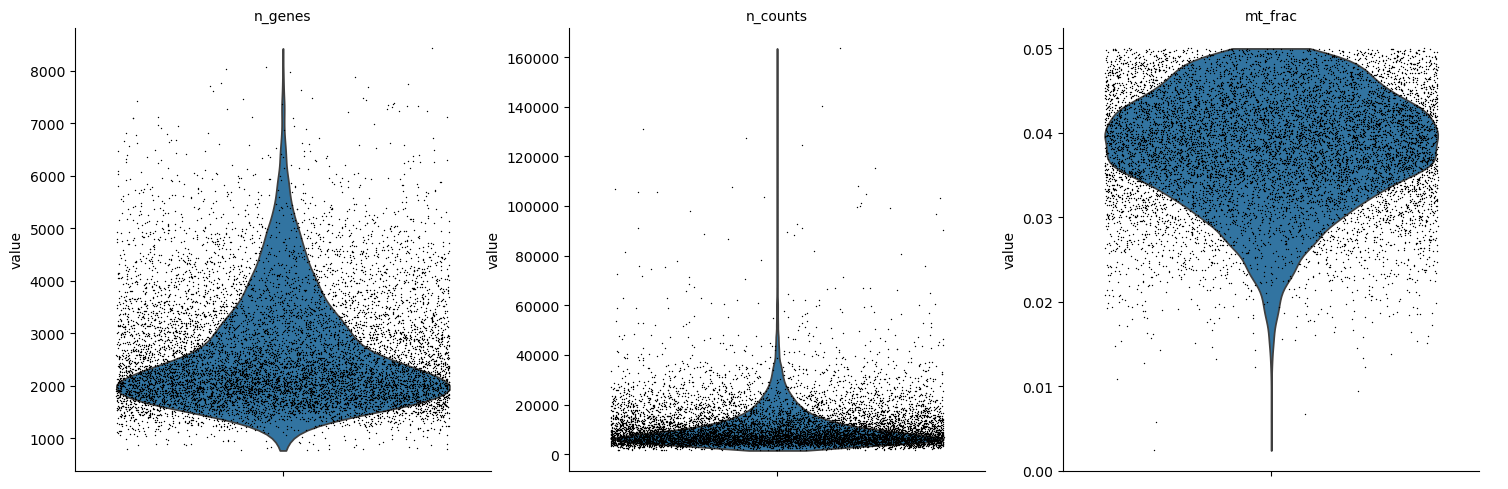

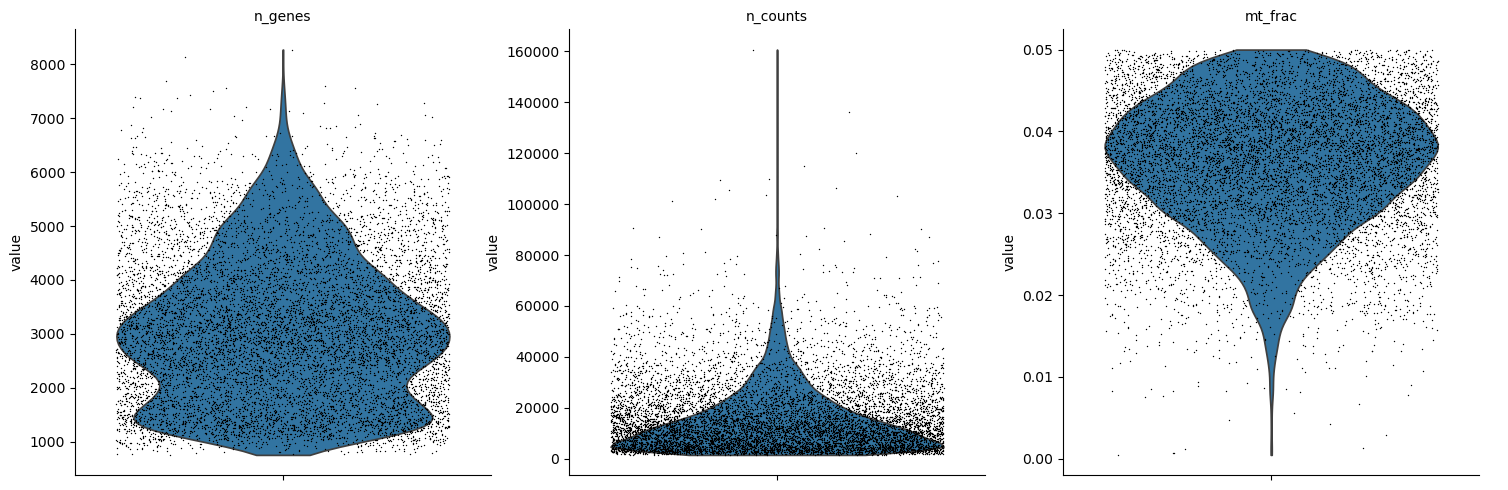

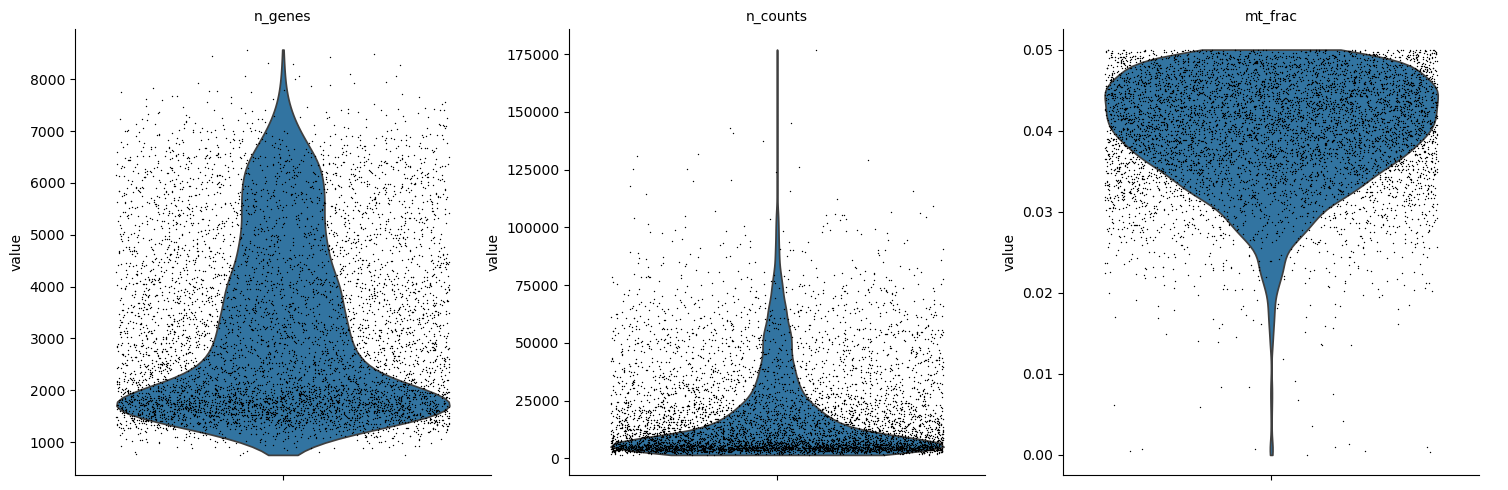

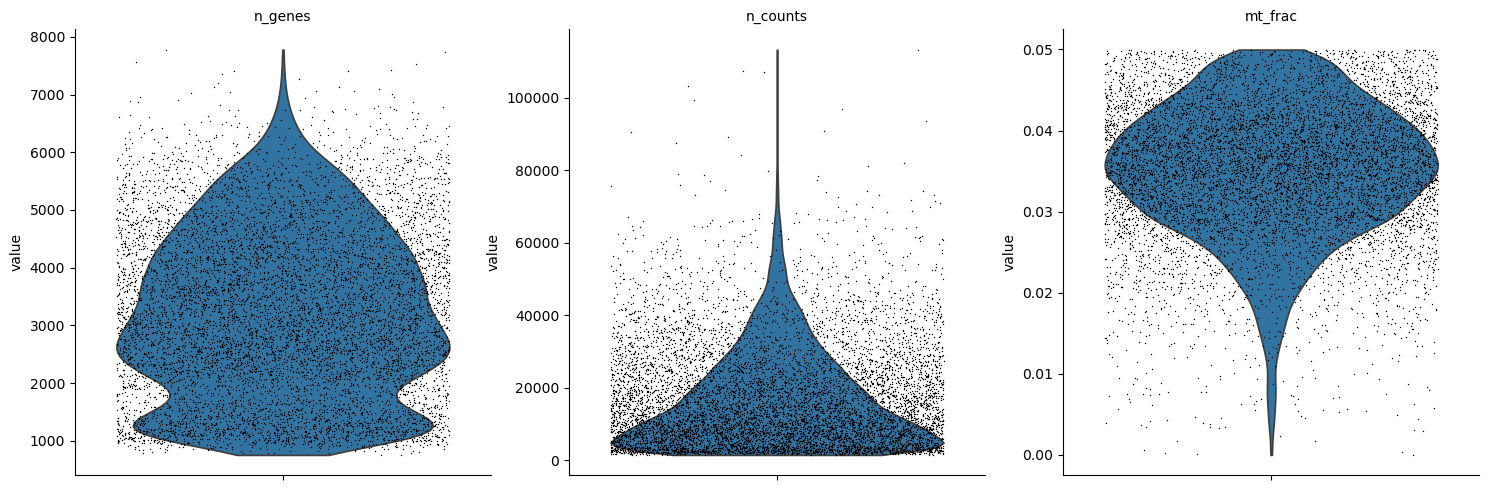

In [7]:
sc.pl.violin(
    adata_MTC,
    ["n_genes", "n_counts", "mt_frac"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    adata_IL7,
    ["n_genes", "n_counts", "mt_frac"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    adata_IL7_IL25,
    ["n_genes", "n_counts", "mt_frac"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    adata_IL7_IL33,
    ["n_genes", "n_counts", "mt_frac"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    adata_IL7_IL25_IL33,
    ["n_genes", "n_counts", "mt_frac"],
    jitter=0.4,
    multi_panel=True,
)

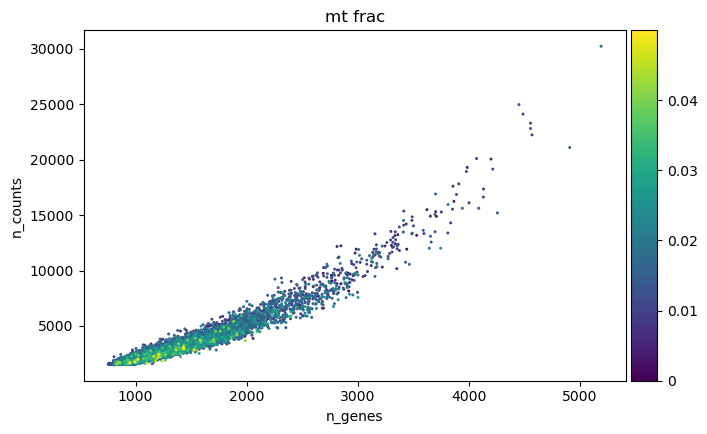

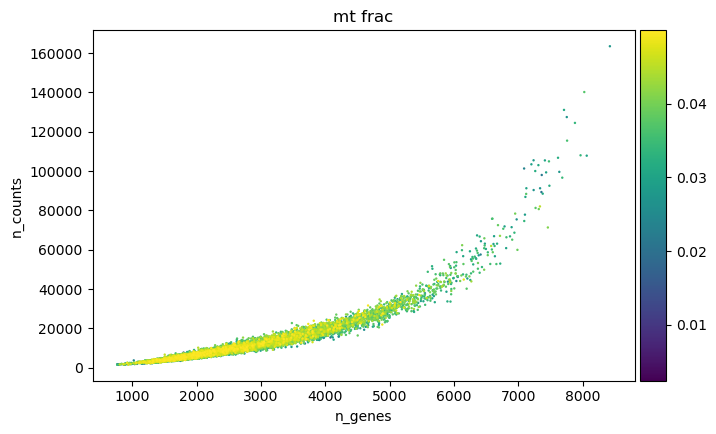

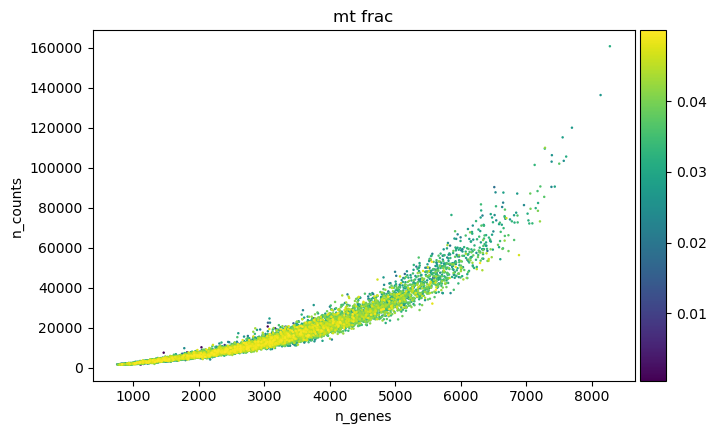

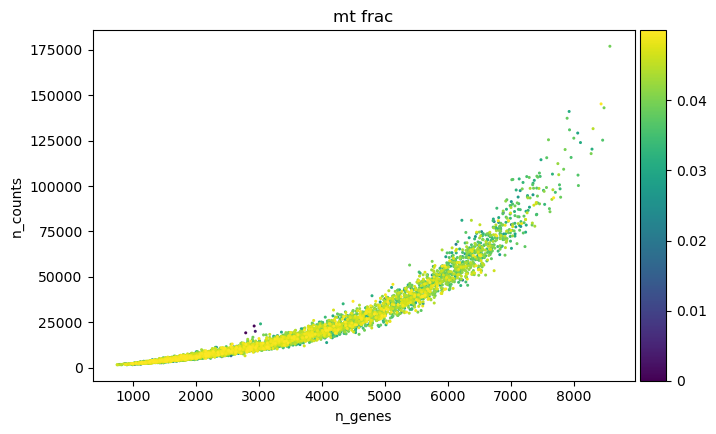

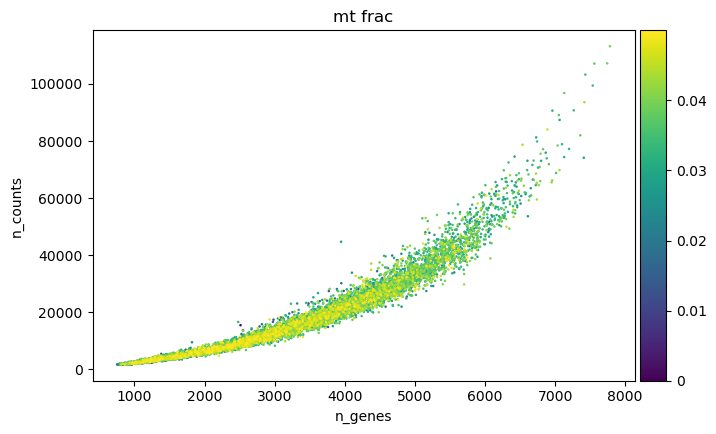

In [8]:
sc.pl.scatter(adata_MTC, "n_genes", "n_counts", color="mt_frac")
sc.pl.scatter(adata_IL7, "n_genes", "n_counts", color="mt_frac")
sc.pl.scatter(adata_IL7_IL25, "n_genes", "n_counts", color="mt_frac")
sc.pl.scatter(adata_IL7_IL33, "n_genes", "n_counts", color="mt_frac")
sc.pl.scatter(adata_IL7_IL25_IL33, "n_genes", "n_counts", color="mt_frac")

# merging datas

In [10]:
# 2. merge data by concatenate
adata_merged = sc.concat(
    [adata_MTC, adata_IL7, adata_IL7_IL25, adata_IL7_IL33, adata_IL7_IL25_IL33],
    keys=['MTC', 'IL7', 'IL7+IL25', 'IL7+IL33', 'IL7+IL25+IL33'],
    label='batch',
    index_unique='-'
)
adata_merged

AnnData object with n_obs × n_vars = 41445 × 32285
    obs: 'n_counts', 'n_genes', 'mt_counts', 'mt_frac', 'batch'

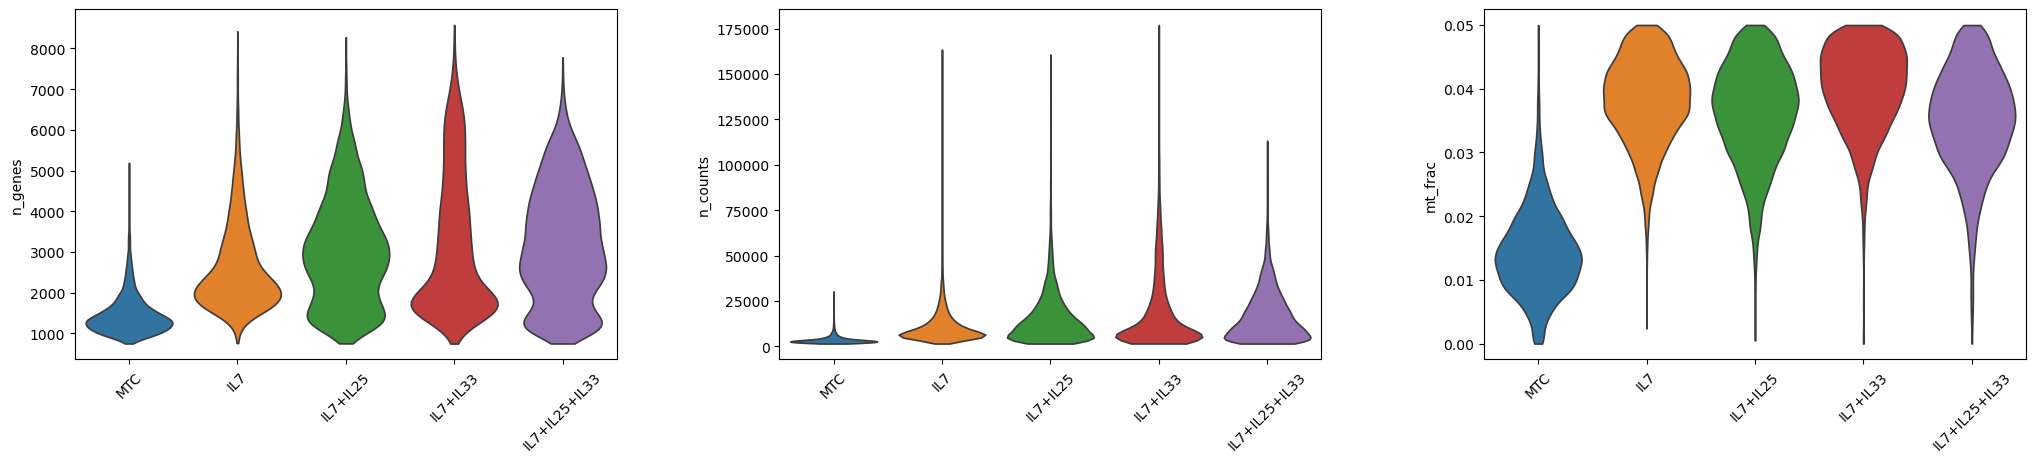

In [11]:
sc.pl.violin(
    adata_merged,
    keys=["n_genes", "n_counts", "mt_frac"],  # 원하는 QC 지표
    groupby="batch",  # 이제 순서가 적용된 batch
    jitter=0.4,
    multi_panel=True,
    rotation=45,
    stripplot=False
)

# pre-filtering using R

# Excluding B & NK cells

In [12]:
# R에서 클러스터링 된 cell_id를 csv로 불러와 맞는 cell 만 선별
# CSV 파일에서 필터링된 세포 ID 불러오기
filtered_cell_ids = pd.read_csv("/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/CRresult_Bystander/exon_only/cell_id_csv/exon_cell_ids.csv")
filtered_cell_ids = filtered_cell_ids.iloc[:, 0]  # 첫 번째 열을 가져옴

# 함수 정의: 접두사에 따라 변환
def convert_cell_id(cell_id):
    if cell_id.startswith("Cord_MTC"):
        return cell_id.replace("Cord_MTC_", "").replace("-1", "-1-MTC")
    elif cell_id.startswith("Cord_IL7_IL25_IL33"):
        return cell_id.replace("Cord_IL7_IL25_IL33_", "").replace("-1", "-1-IL7+IL25+IL33")
    elif cell_id.startswith("Cord_IL7_IL25"):
        return cell_id.replace("Cord_IL7_IL25_", "").replace("-1", "-1-IL7+IL25")
    elif cell_id.startswith("Cord_IL7_IL33"):
        return cell_id.replace("Cord_IL7_IL33_", "").replace("-1", "-1-IL7+IL33")    
    elif cell_id.startswith("Cord_IL7_"):
        return cell_id.replace("Cord_IL7_", "").replace("-1", "-1-IL7")
    # 다른 케이스가 있을 경우 추가 가능
    else:
        return cell_id  # 변환되지 않은 경우 원본 반환
filtered_cell_ids_modified = filtered_cell_ids.apply(convert_cell_id)
filtered_cell_ids_modified
adata_filtered = adata_merged[adata_merged.obs_names.isin(filtered_cell_ids_modified), :]
adata_filtered

View of AnnData object with n_obs × n_vars = 24135 × 32285
    obs: 'n_counts', 'n_genes', 'mt_counts', 'mt_frac', 'batch'
    uns: 'batch_colors'

In [16]:
adata_filtered.write('/home/jaehyunchoi/bystander_collaboration/Figure_script_IPF/Data/Byst_filtered.h5ad')

In [14]:
filtered_MTC = adata_filtered[adata_filtered.obs['batch'] == 'MTC']
filtered_IL7 = adata_filtered[adata_filtered.obs['batch'] == 'IL7']
filtered_IL7_IL25 = adata_filtered[adata_filtered.obs['batch'] == 'IL7+IL25']
filtered_IL7_IL33 = adata_filtered[adata_filtered.obs['batch'] == 'IL7+IL33']
filtered_IL7_IL25_IL33 = adata_filtered[adata_filtered.obs['batch'] == 'IL7+IL25+IL33']

In [15]:
# Velocyto를 통해 얻은 spliced unspliced count 정보를 추가해준다. 
# Read velocyto output
Velodata_MTC = scv.read('/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/Bystander_analysis/10xInput/velo_MTC/run_Bystander_MTC.loom', cache=True)
Velodata_IL7 = scv.read('/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/Bystander_analysis/10xInput/velo_IL7/run_Bystander_IL7.loom', cache=True)
Velodata_IL7_IL25 = scv.read('/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/Bystander_analysis/10xInput/velo_IL7_IL25/run_Bystander_IL7_IL25.loom', cache=True)
Velodata_IL7_IL33 = scv.read('/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/Bystander_analysis/10xInput/velo_IL7_IL33/run_Bystander_IL7_IL33.loom', cache=True)
Velodata_IL7_IL25_IL33 = scv.read('/home/jaehyunchoi/bystander_collaboration/pipeline_singlecell/Bystander_analysis/10xInput/velo_IL7_IL25_IL33/run_Bystander_IL7_IL25_IL33.loom', cache=True)

# Merge velocyto with cellranger matrix
merdata_MTC= scv.utils.merge(filtered_MTC, Velodata_MTC)
merdata_IL7= scv.utils.merge(filtered_IL7, Velodata_IL7)
merdata_IL7_IL25= scv.utils.merge(filtered_IL7_IL25, Velodata_IL7_IL25)
merdata_IL7_IL33= scv.utils.merge(filtered_IL7_IL33, Velodata_IL7_IL33)
merdata_IL7_IL25_IL33= scv.utils.merge(filtered_IL7_IL25_IL33, Velodata_IL7_IL25_IL33)

In [18]:
# 데이터 병합하기
merdata_merged = sc.concat(
    [merdata_MTC, merdata_IL7, merdata_IL7_IL25, merdata_IL7_IL33, merdata_IL7_IL25_IL33],
    keys=['MTC', 'IL7', 'IL7+IL25', 'IL7+IL33', 'IL7+IL25+IL33'],
    label='batch',
    index_unique='-'
)
merdata_merged.write('/home/jaehyunchoi/bystander_collaboration/Figure_script_IPF/Data/Byst_velocyto.h5ad')
merdata_merged

AnnData object with n_obs × n_vars = 24129 × 32285
    obs: 'n_counts', 'n_genes', 'mt_counts', 'mt_frac', 'batch', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [19]:
merdata_merged.obs['batch'] = merdata_merged.obs['batch'].str.replace('MTC','MPEC')

# Dimension reduction, UMAP, TSNE

[[ 7.1776104   2.9628413   0.01011177  2.078374    1.2267771 ]
 [ 6.0036473   7.1533012  -8.362138   -3.2984014   1.4219618 ]
 [ 8.39908    -1.0158802   1.8330076  -0.34930432 -4.343095  ]
 [ 8.53118     4.173226   -1.1130753   0.07051504 -0.73217714]
 [ 9.273808    6.5968976   1.220024    0.24352145 -3.4396846 ]]


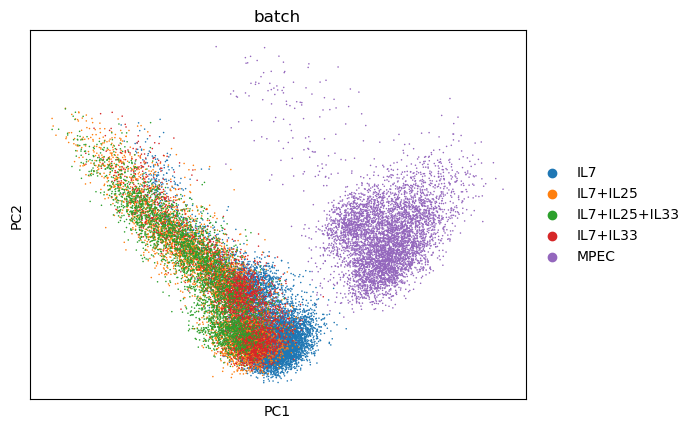

In [20]:
# 정규화: 각 세포의 총 발현을 1로 맞추고 로그 변환
sc.pp.normalize_total(merdata_merged, target_sum=1e4)
sc.pp.log1p(merdata_merged)

# 변수 유전자 설정 
sc.pp.highly_variable_genes(merdata_merged, flavor='seurat', n_top_genes=2000)

# Scale data
sc.pp.scale(merdata_merged, max_value=10)
# Run PCA
sc.tl.pca(merdata_merged, svd_solver='arpack', n_comps=30)
print(merdata_merged.obsm['X_pca'][:5, :5])
sc.pl.pca(merdata_merged, color='batch')

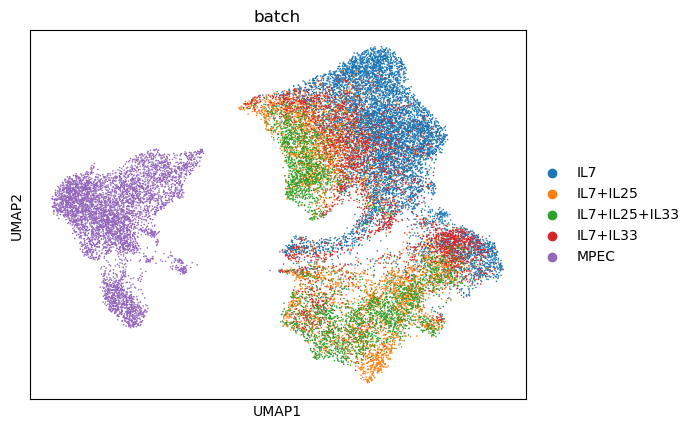

In [21]:
# t-sne 
sc.tl.tsne(merdata_merged, use_rep='X_pca', n_pcs=20)
# umap
sc.pp.neighbors(merdata_merged, n_pcs=20, use_rep='X_pca')
sc.tl.umap(merdata_merged)
sc.pl.umap(merdata_merged, color=['batch'])

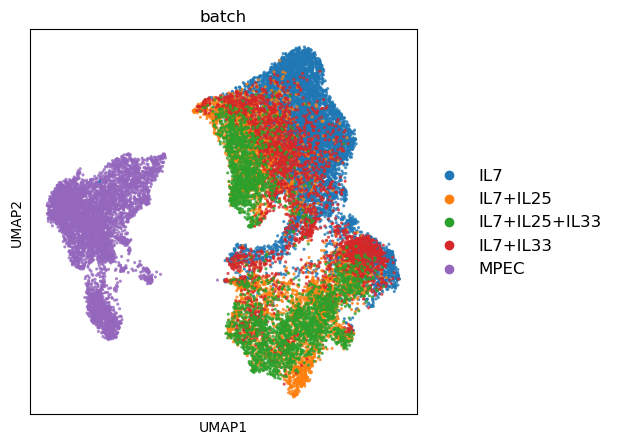

In [22]:
# Figure 생성
fig, ax = plt.subplots(figsize=(5, 5))

# Scanpy UMAP 플롯 (기존 색상 유지)
sc.pl.umap(
    merdata_merged, 
    color='batch',
    size=20,
    alpha=0.8,
    legend_fontsize=12,
    #palette=loaded_color_dict,  # ✅ 기존 색상 적용
    ax=ax  
)

plt.show()

# Batch correction with BBKNN

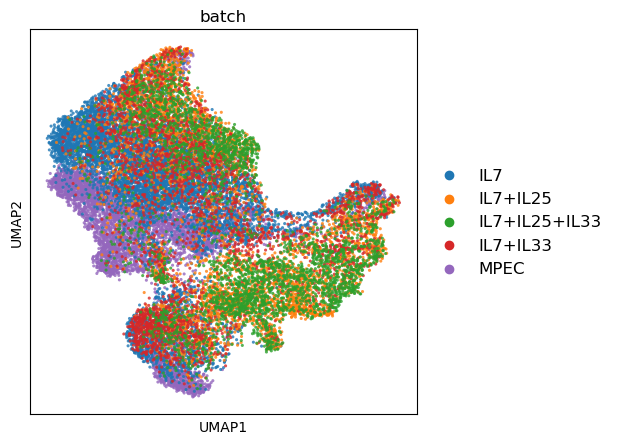

In [25]:
import bbknn
bbknn.bbknn(merdata_merged, batch_key='batch')
sc.tl.umap(merdata_merged)

# Figure 생성
fig, ax = plt.subplots(figsize=(5, 5))

# Scanpy UMAP 플롯 (기존 색상 유지)
sc.pl.umap(
    merdata_merged, 
    color='batch',
    size=20,
    alpha=0.8,
    legend_fontsize=12,
    #palette=loaded_color_dict,  # ✅ 기존 색상 적용
    ax=ax  
)

plt.show()

# Celltype annotation (before Differentiation)

In [29]:
marker_genes = {
    "Treg" : ["Foxp3", "Entpd1", "Pdcd1", "Klrg1", "Ctla4", "Lag3", "Il10", "Havcr2", "Tigit", "Tnfrsf18"],
    "Th1" : ["Tbx21", "Runx3", "Cxcr3", "Il18r1", "Tnf"],
    "Th2" : ["Gata3", "Il5", "Il13", "Il17rb", "Ccr4", "Ccr8"],
    "Th17" : ["Rorc", "Rora", "Batf", "Il1r1", "Il23r", "Ccr6"],
    "Tfh" : ["Bcl6", "Cxcr5", "Il21", "Pdcd1", "Icos", "Il6ra"],
    "Trm" : ["Cxcr3", "Itgae", "Itga1"],
    "Tem" : [ "Il7r", "Il2rb", "Id2"],
    "Naive" : ["Sell", "Lef1", "Il2rg", "Txnip"]}
marker_genes_simple = ["Ifit3" , "Ifit1" , "Ccr6" , "Ccr4", "Rora" , "Rorc" , "Ctla4", "Foxp3", "Cxcr6", "Cxcr3" ,"Ccr5", "Id2", "Tbx21", 
     "Il21", "Pdcd1", "Cxcr5", "Bcl6", "Ccr7", "Tcf7", "Lef1"]

In [27]:
# MTC batch만 포함된 adata_MTC 형성
# MPEC 중 PD-1 high 한 cell group의 분화 과정을 보는거기에 PD-1 high cell group을 annotation하는것이 중요
adataMTC= merdata_merged[merdata_merged.obs['batch']== 'MPEC'].copy()
adataMTC

AnnData object with n_obs × n_vars = 5239 × 32285
    obs: 'n_counts', 'n_genes', 'mt_counts', 'mt_frac', 'batch', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'batch_colors', 'tsne', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

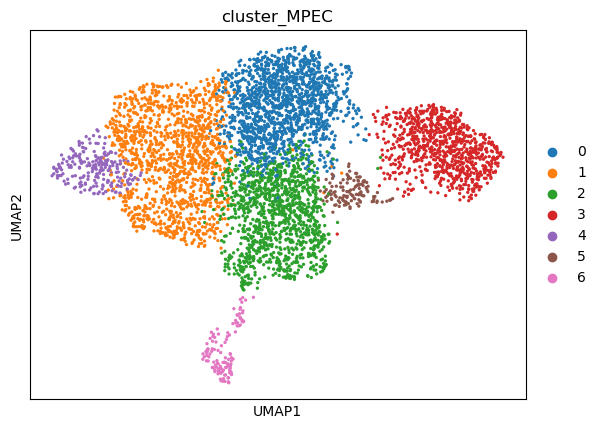

In [28]:
# t-sne 
sc.tl.tsne(adataMTC, use_rep='X_pca', n_pcs=20)
# umap
sc.pp.neighbors(adataMTC, n_pcs=20, use_rep='X_pca')
sc.tl.umap(adataMTC)
sc.tl.leiden(adataMTC, resolution=0.4, key_added="cluster_MPEC")
sc.pl.umap(adataMTC, color=['cluster_MPEC'])

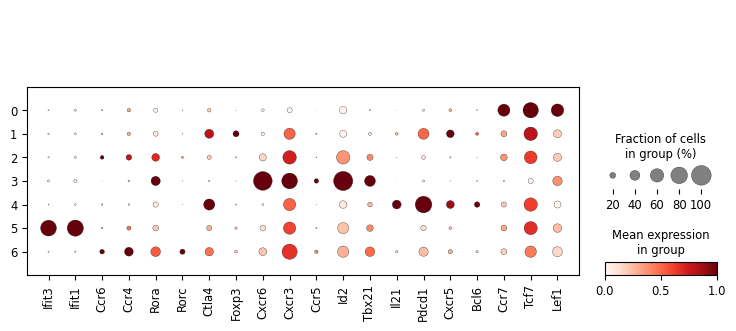

In [30]:
sc.pl.dotplot(adataMTC, marker_genes_simple, groupby="cluster_MPEC", standard_scale="var")

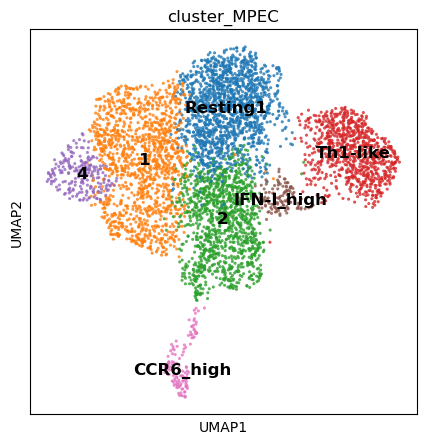

In [31]:
adataMTC.obs['cluster_MPEC'] = adataMTC.obs['cluster_MPEC'].replace({
    '0': 'Resting1',
    '3': 'Th1-like',
    '6': 'CCR6_high',
    '5': 'IFN-I_high'
})

# Figure 생성
fig, ax = plt.subplots(figsize=(5, 5))

# Scanpy UMAP 플롯 (기존 색상 유지)
sc.pl.umap(
    adataMTC, 
    color='cluster_MPEC',
    size=20,
    alpha=0.8,
    legend_fontsize=12,
    legend_loc="on data",
    ax=ax  
)

plt.show()

In [32]:
# 1,2,4 를 FOXP high PD1 high (Treg)와 구분하기 위해 sub clustering 진행
adata_subMPEC = adataMTC[~adataMTC.obs['cluster_MPEC'].isin(['Resting1', 'Th1-like', 'CCR6_high','IFN-I_high'])].copy()
adata_subMPEC

AnnData object with n_obs × n_vars = 2697 × 32285
    obs: 'n_counts', 'n_genes', 'mt_counts', 'mt_frac', 'batch', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'cluster_MPEC'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'batch_colors', 'tsne', 'neighbors', 'umap', 'cluster_MPEC', 'cluster_MPEC_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

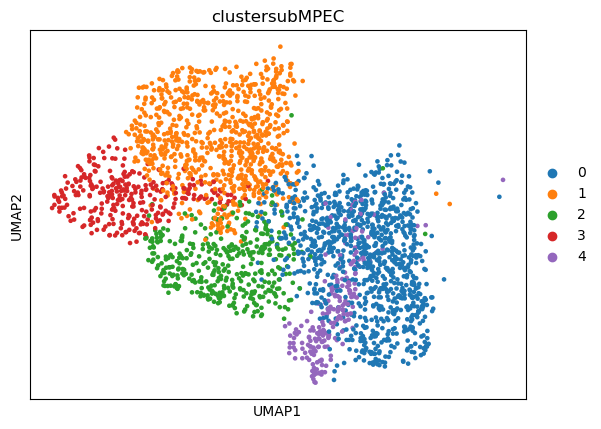

In [33]:
sc.tl.leiden(adata_subMPEC, resolution=0.37, key_added="clustersubMPEC")
sc.pl.umap(adata_subMPEC, color=['clustersubMPEC'])

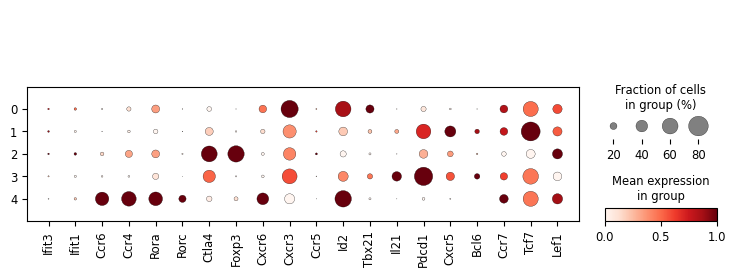

In [34]:
sc.pl.dotplot(adata_subMPEC, marker_genes_simple, groupby="clustersubMPEC", standard_scale="var")

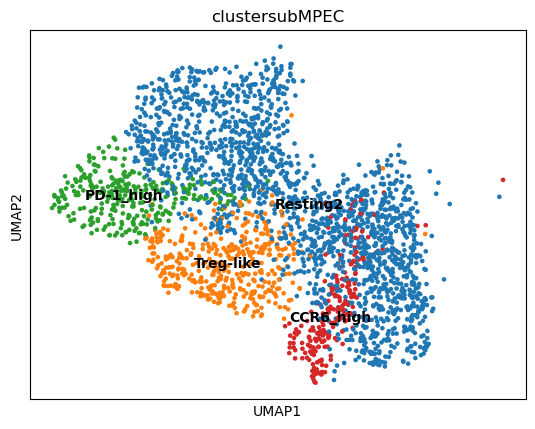

In [35]:
adata_subMPEC.obs['clustersubMPEC'] = adata_subMPEC.obs['clustersubMPEC'].replace({
    '0': 'Resting2',
    '1': 'Resting2',
    '3': 'PD-1_high',
    '2': 'Treg-like',
    '4': 'CCR6_high'
})

sc.pl.umap(adata_subMPEC, color=['clustersubMPEC'], legend_loc="on data")

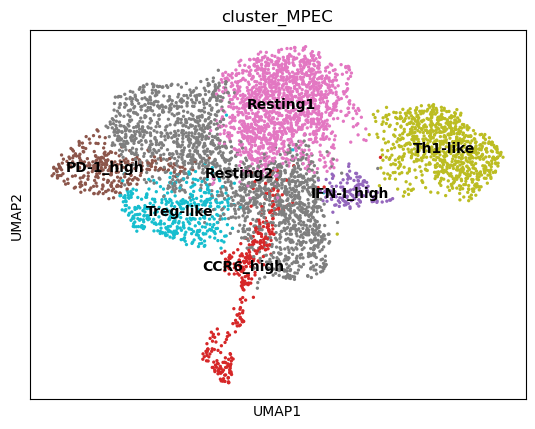

In [36]:
# Categorical 타입 통일
adataMTC.obs['cluster_MPEC'] = pd.Categorical(
    adataMTC.obs['cluster_MPEC'], 
    categories=sorted(set(adataMTC.obs['cluster_MPEC'].cat.categories) | set(adata_subMPEC.obs['clustersubMPEC'].cat.categories))
)
adata_subMPEC.obs['clustersubMPEC'] = pd.Categorical(
    adata_subMPEC.obs['clustersubMPEC'], 
    categories=sorted(set(adataMTC.obs['cluster_MPEC'].cat.categories) | set(adata_subMPEC.obs['clustersubMPEC'].cat.categories))
)

adataMTC.obs.loc[adataMTC.obs['cluster_MPEC'].isin(['1', '2', '4']), 'cluster_MPEC'] = adata_subMPEC.obs['clustersubMPEC']
sc.pl.umap(adataMTC, color=['cluster_MPEC'], legend_loc="on data")

In [38]:
# cell 수가 0인 클러스터 지우기 
adataMTC = adataMTC[~adataMTC.obs['cluster_MPEC'].isin(['1', '2', '4'])].copy()
print(adataMTC.obs['cluster_MPEC'].value_counts())

cluster_MPEC
Resting2      1791
Resting1      1473
Th1-like       823
Treg-like      389
CCR6_high      341
PD-1_high      299
IFN-I_high     123
Name: count, dtype: int64


In [45]:
adataMTC.obs['cluster_MPEC'] = adataMTC.obs['cluster_MPEC'].replace({
    'Resting1': 'Resting',
    'Resting2': 'Resting'
})
print(adataMTC.obs['cluster_MPEC'].value_counts())

cluster_MPEC
Resting       3264
Th1-like       823
Treg-like      389
CCR6_high      341
PD-1_high      299
IFN-I_high     123
Name: count, dtype: int64


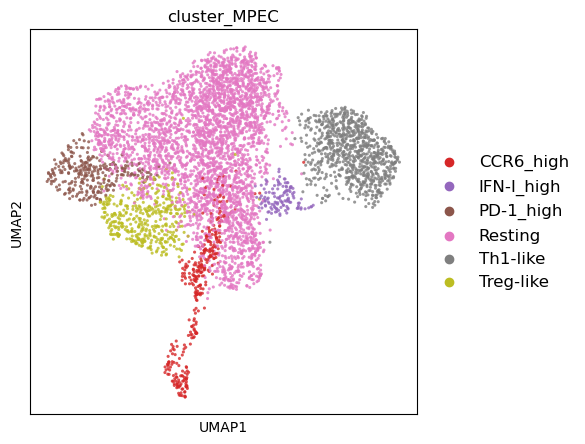

In [46]:
# Figure 생성
fig, ax = plt.subplots(figsize=(5, 5))

# Scanpy UMAP 플롯 (기존 색상 유지)
sc.pl.umap(
    adataMTC, 
    color='cluster_MPEC',
    size=20,
    alpha=0.8,
    legend_fontsize=12,
    #palette=loaded_color_dict,  # ✅ 기존 색상 적용
    ax=ax  
)

plt.show()

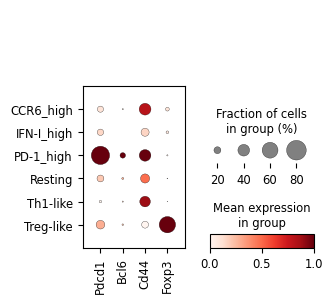

In [47]:
sc.pl.dotplot(adataMTC, ["Pdcd1","Bcl6","Cd44","Foxp3"], groupby="cluster_MPEC", standard_scale="var")

# Celltype annotation (after differentiation)

In [49]:
adata_diff = merdata_merged[merdata_merged.obs['batch'] != 'MPEC'].copy()
adata_diff

AnnData object with n_obs × n_vars = 18890 × 32285
    obs: 'n_counts', 'n_genes', 'mt_counts', 'mt_frac', 'batch', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'batch_colors', 'tsne', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [54]:
# t-sne 
sc.tl.tsne(adata_diff, use_rep='X_pca', n_pcs=20)
# umap
sc.pp.neighbors(adata_diff, n_pcs=20, use_rep='X_pca')
sc.tl.umap(adata_diff)
sc.tl.leiden(adata_diff, resolution=0.45, key_added="cluster_diff")

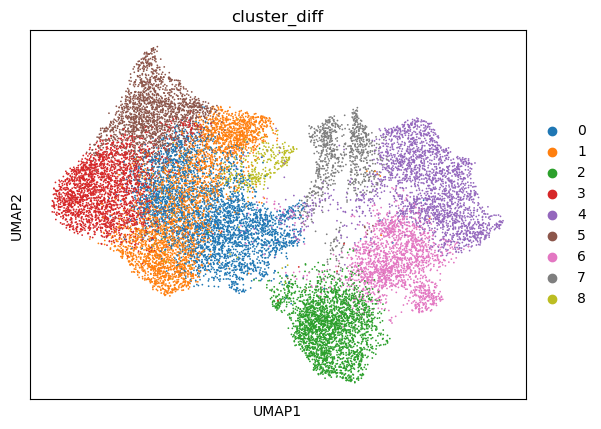

In [56]:
sc.pl.umap(adata_diff, color=['cluster_diff'])

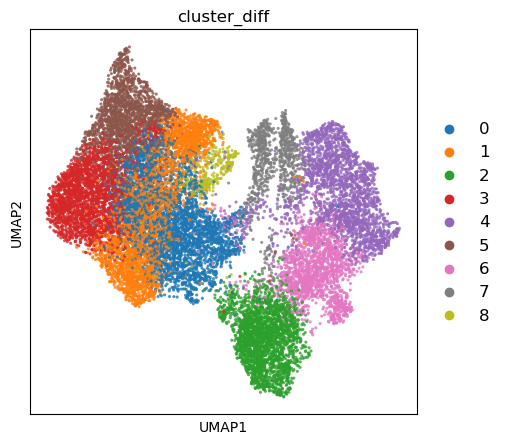

In [58]:
fig, ax = plt.subplots(figsize=(5, 5))

# Scanpy UMAP 플롯 (기존 색상 유지)
sc.pl.umap(
    adata_diff, 
    color='cluster_diff',
    size=20,
    alpha=0.8,
    legend_fontsize=12,
    #palette=loaded_color_dict,  # ✅ 기존 색상 적용
    ax=ax  
)

plt.show()

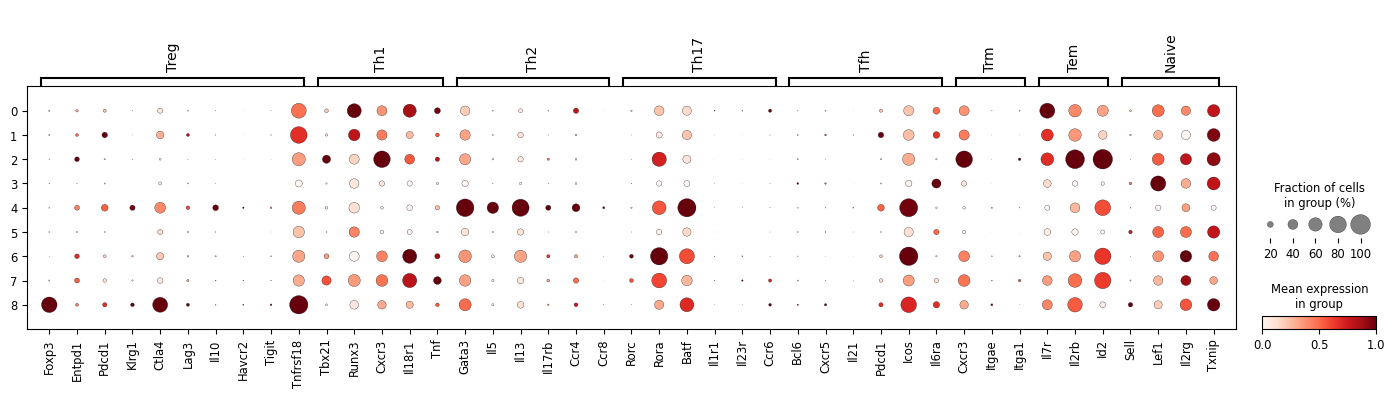

In [57]:
sc.pl.dotplot(adata_diff, marker_genes, groupby="cluster_diff", standard_scale="var")